In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [26]:
# lets use the titanic dataset
ds = pd.read_csv("train.csv")

In [27]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# lets fill the NaN values of age column with median
ds['Age']=ds['Age'].fillna(ds['Age'].median())

In [29]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Univariate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


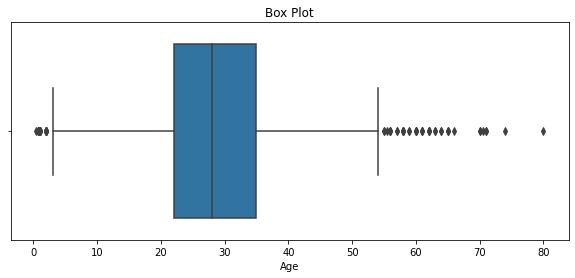

In [30]:
# Box plot
def Box_plot(ds):
  plt.figure(figsize = (10,4))
  plt.title("Box Plot")
  sns.boxplot(ds)
  plt.show()

# call the boxplot function
Box_plot(ds['Age'])

All the points lying outside the 0%(minimum value) and 100%(maximum value) of the box-plot are the outliers

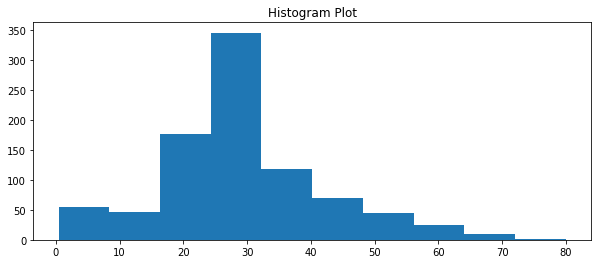

In [31]:
# histogram
def hist_plot(ds):
  plt.figure(figsize=(10,4))
  plt.hist(ds)
  plt.title("Histogram Plot")
  plt.show()

hist_plot(ds['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


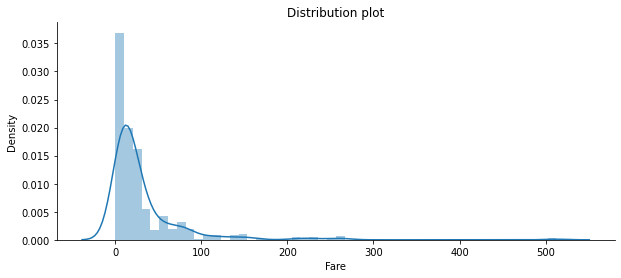

In [33]:
# Distribution plot
def dist_plot(ds):
  plt.figure(figsize = (10,4))
  sns.distplot(ds)
  plt.title("Distribution plot")
  sns.despine()
  plt.show()

dist_plot(ds["Fare"])

We can see that the plot is skewed towards right

### Multivariate

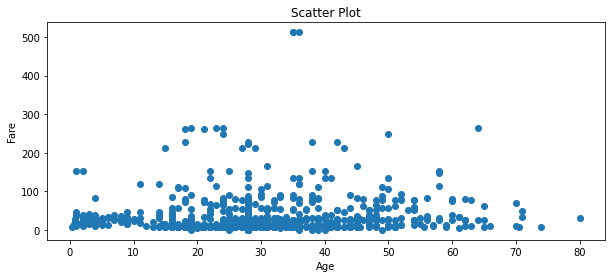

In [35]:
# Scatter plot
def scatter_plot(ds1, ds2):
  fig, ax = plt.subplots(figsize=(10, 4))
  ax.scatter(ds1, ds2)
  ax.set_xlabel("Age")
  ax.set_ylabel("Fare")
  plt.title("Scatter Plot")
  plt.show()

scatter_plot(ds['Age'], ds['Fare'])

The datapoints that are far away from the group can be considered as outliers

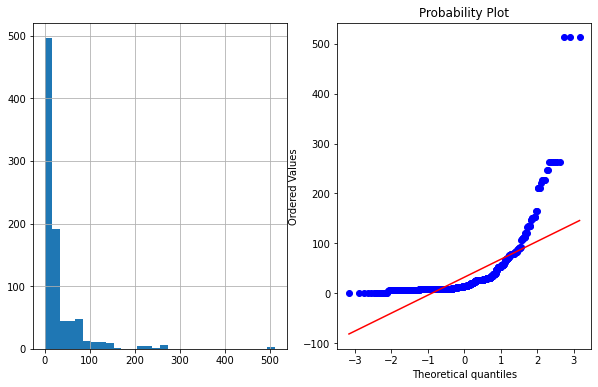

In [37]:
# QQ plot
def qq_plot(ds, variable):
    # function to plot a histogram and a Q-Q plot side by side  
    plt.figure(figsize=(10,6))
    plt.subplot(1, 2, 1)
    ds[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(ds[variable], dist="norm", plot=plt)
    plt.show()

qq_plot(ds, 'Fare')
